In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2024-04-04'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3077,2024-03-27,152.145004,152.690002,150.130005,151.940002,151.940002,16622000
3078,2024-03-28,152.000000,152.669998,151.330002,152.259995,152.259995,21105600
3079,2024-04-01,151.830002,157.000000,151.649994,156.500000,156.500000,24469800
3080,2024-04-02,154.750000,155.990005,153.460007,155.869995,155.869995,17598100


In [5]:
ma_100_days = data.Close.rolling(100).mean()


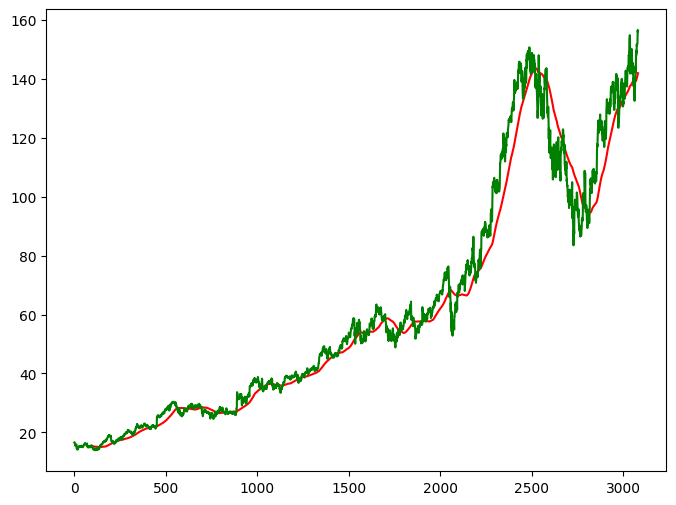

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

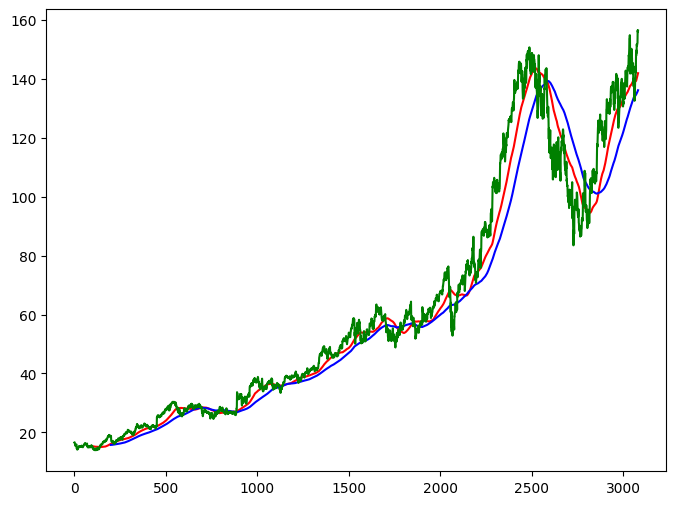

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2465

In [12]:
data_test.shape[0]

617

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [1]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

NameError: name 'Sequential' is not defined

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0354
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0046
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0041
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0029
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0031
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0036
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0024
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0027
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0026
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0026
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0021
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0024
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0020
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0018
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0020
Epoc

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


In [32]:
print(y_predict)

[[55.72786023]
 [56.08343616]
 [56.49782145]
 [56.93437883]
 [57.31183093]
 [57.57888387]
 [57.73269595]
 [57.86867027]
 [58.0598333 ]
 [58.3581404 ]
 [58.72197593]
 [59.11838419]
 [59.53164673]
 [59.96788208]
 [60.43144632]
 [60.91478485]
 [61.4003036 ]
 [61.8409342 ]
 [62.20413002]
 [62.50869927]
 [62.77600461]
 [63.01529783]
 [63.22973393]
 [63.43636738]
 [63.63899722]
 [63.80522916]
 [63.90763854]
 [63.93845753]
 [63.86450414]
 [63.70717586]
 [63.46793486]
 [63.14371318]
 [62.77029078]
 [62.37553182]
 [61.99399343]
 [61.6961128 ]
 [61.53417603]
 [61.51392741]
 [61.61836905]
 [61.79612874]
 [61.98003742]
 [62.1499074 ]
 [62.27711298]
 [62.32273222]
 [62.26760008]
 [62.1366085 ]
 [61.99226579]
 [61.88483886]
 [61.84741829]
 [61.87205346]
 [61.93788216]
 [62.01990366]
 [62.08530154]
 [62.11847047]
 [62.11060253]
 [61.98708288]
 [61.70394593]
 [61.26012115]
 [60.70394763]
 [60.11054066]
 [59.56012013]
 [59.07736038]
 [58.67076906]
 [58.2980734 ]
 [57.91634788]
 [57.48050419]
 [56.93187

In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

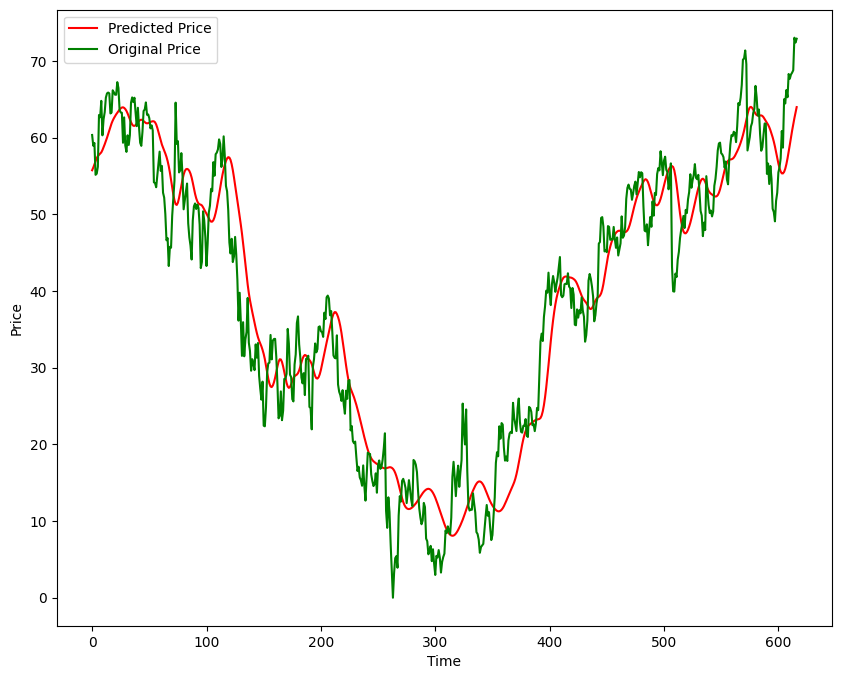

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock_Predictions_Model.keras')